In [1]:
import numpy as np
import cv2
import os
import sys
import matplotlib.pyplot as plt
import serial
import time
from IPython.display import clear_output

%matplotlib inline
sys.path.insert(0, os.path.join(os.getcwd(), 'src'))

from Thymio import Thymio

import vision
import globalNavigation
import utils

# Main


In [3]:
#RUN ONLY ONCE PER KERNEL START TO AVOID BUGS
%matplotlib inline
th = Thymio.serial(port="/dev/cu.usbmodem14401", refreshing_rate=0.1)
cap = vision.VideoCapture("http://192.168.13.124:8080/video")

path original:
[[60 59 58 57 56 55 54 53 52 51 50 49 48 47 46 45 44 43 42 41 40 39 38 37
  36 35 34 33 32 31 30 29 28 27 26 25 24 23 22]
 [12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
  12 12 12 12 12 12 12 12 12 12 12 13 13 13 14]]
path simple:
[[865, 173], [317, 202]]
path index: 0
angleToTurn: 90.56778264644487


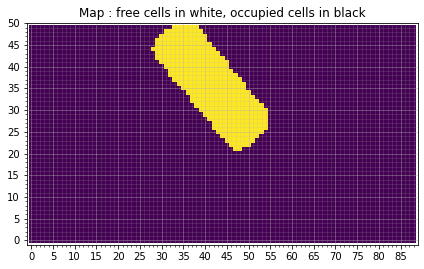

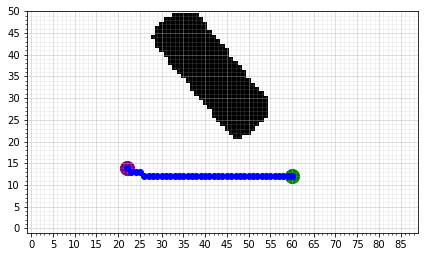

In [15]:
import importlib
importlib.reload(vision)
importlib.reload(globalNavigation)
importlib.reload(utils)

ourThymio = utils.virtualThymio(cap,th)

path = utils.analyze(ourThymio)
print('path original:')
print(path)
tempPath = globalNavigation.transformPath(path)
simplePath = globalNavigation.pathSimplifier(tempPath)
print('path simple:')
print(simplePath)

globalNavigation.followPath(ourThymio, simplePath)

# Manual Debug

#### Read image and display it

<Figure size 432x288 with 0 Axes>

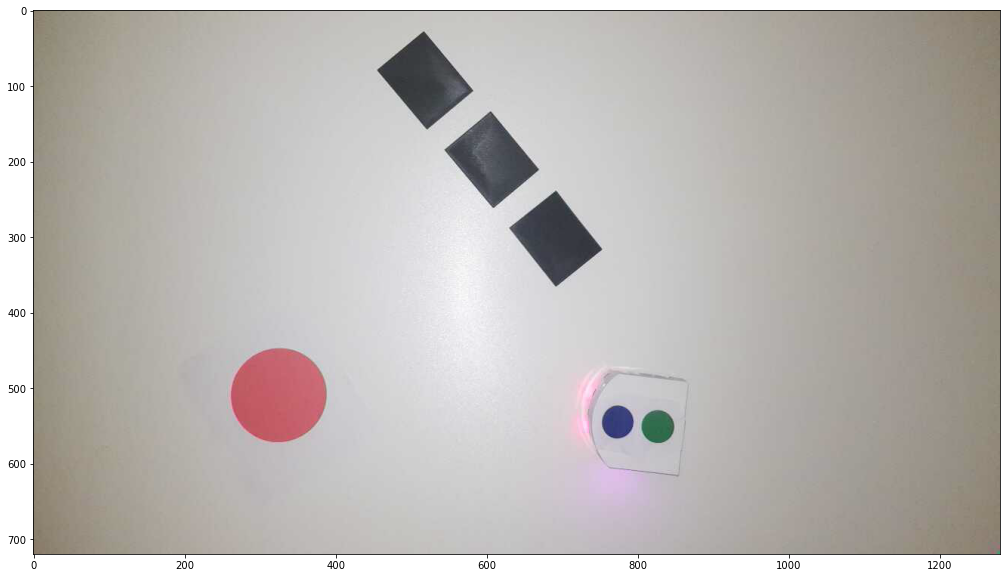

In [17]:
#RUN CELL 1 TO HAVE IMPORTS
%matplotlib inline
capDebug = vision.VideoCapture("http://192.168.13.124:8080/video")

plt.figure()
viewCam = False

while viewCam:
    frameDebug = capDebug.read()
    frameDebug = cv2.cvtColor(frameDebug,cv2.COLOR_BGR2RGB)
    plt.imshow(frameDebug)
    plt.show()
    time.sleep(1)
    clear_output()
    
raw_frame = cap.read()
plt.figure(figsize = (50,10))
plt.imshow(cv2.cvtColor(raw_frame,cv2.COLOR_BGR2RGB))
plt.show()


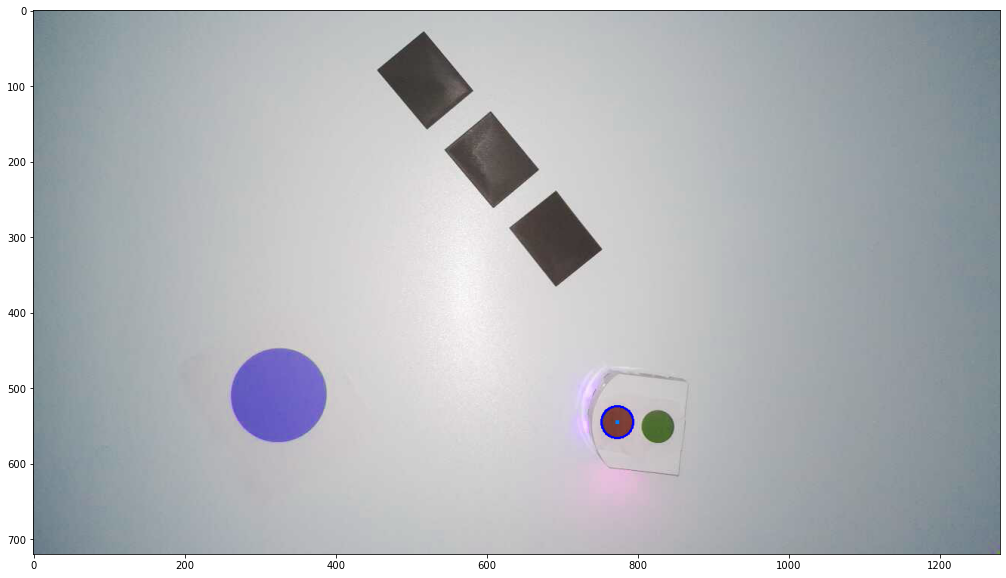

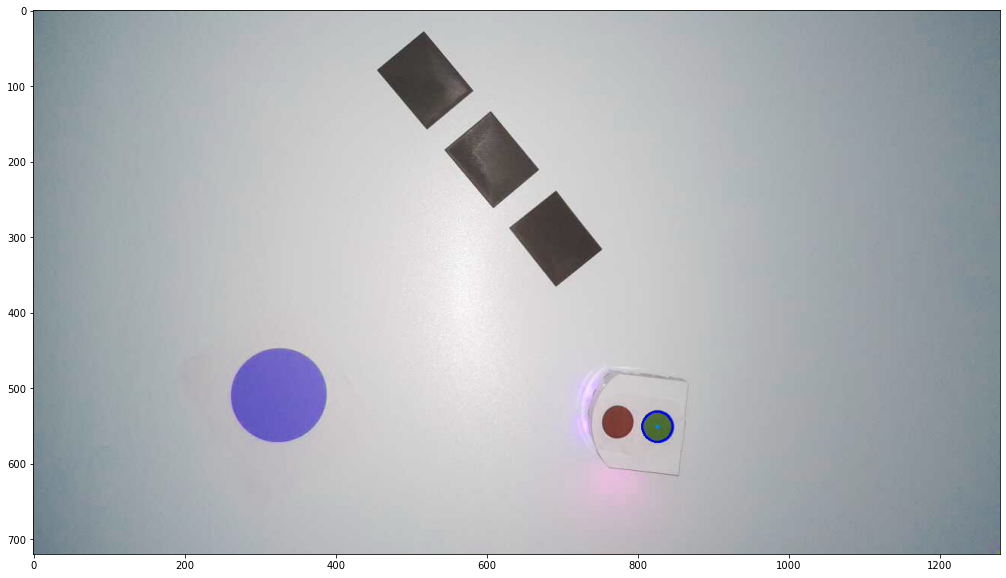

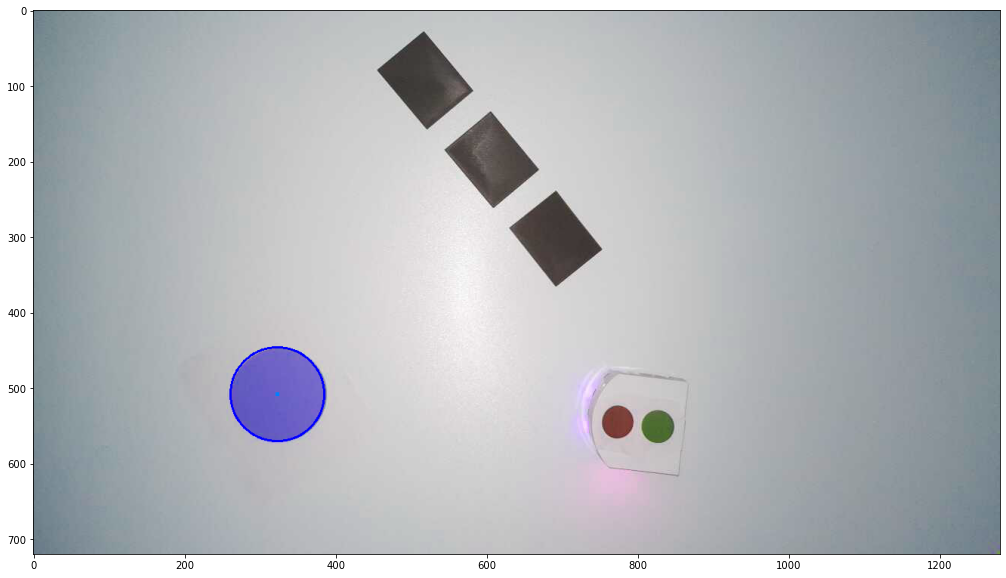

In [18]:
importlib.reload(vision)
%matplotlib inline
frame = raw_frame.copy()
robot_front_absolute, front_image = vision.find_thymio_front(frame)
robot_center_absolute, center_image = vision.find_thymio_center(frame)
destination_center_absolute, destination_image = vision.find_destination_center(frame)
plt.figure(figsize = (50,10))
plt.imshow(front_image)
plt.show()
plt.figure(figsize = (50,10))
plt.imshow(center_image)
plt.show()
plt.figure(figsize = (50,10))
plt.imshow(destination_image)
plt.show()

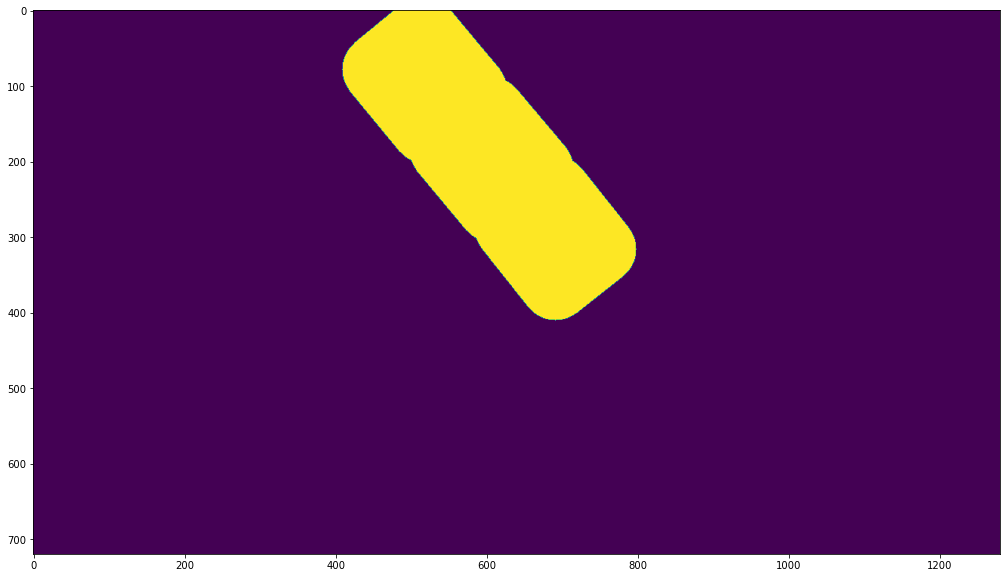

In [19]:
importlib.reload(vision)
%matplotlib inline
importlib.reload(vision)
output_objects = vision.find_objects(frame)
output_objects = cv2.cvtColor(output_objects, cv2.COLOR_BGR2GRAY)
plt.figure(figsize = (50,10))
plt.imshow(output_objects)
plt.show()

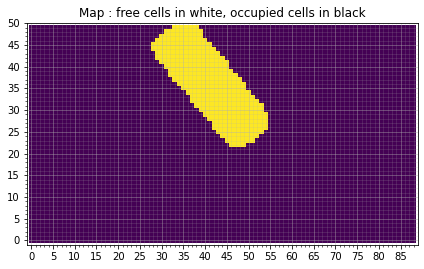

In [20]:
importlib.reload(globalNavigation)
occupancy_grid, cmap = globalNavigation.display_occupancy_grid(output_objects)

array([[70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55,
        54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39,
        38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23,
        22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,
         6,  5],
       [ 5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
         5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
         5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
         5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
         5,  5]])

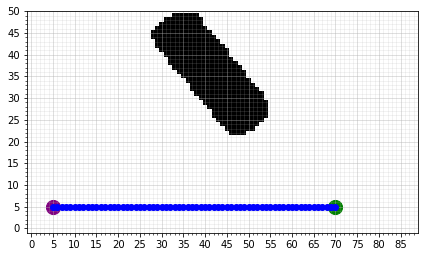

In [22]:
# Define the start and end goal
start = (70,5)
goal = (5,5)

globalNavigation.runAstar(start, goal, utils.A_STAR_Y_AXIS_SIZE, occupancy_grid, cmap)

In [96]:
th.set_var('motor.left.target', 50)
th.set_var('motor.right.target', 50)

In [30]:
th.set_var('motor.left.target', 0)
th.set_var('motor.right.target', 0)

In [33]:
#with 100 and -100 speed, rotation takes 8.76 sec
#forward value is 37.95

[[ 8.97000000e+02  1.55000000e+02 -3.79500000e+01  4.64753460e-15]
 [ 8.97000000e+02  1.55000000e+02 -3.79500000e+01  4.64753460e-15]
 [ 8.97000000e+02  1.54000000e+02 -3.79432467e+01  7.15910316e-01]
 [ 8.96000000e+02  1.54000000e+02 -3.79429846e+01  7.29672780e-01]
 [ 8.97000000e+02  1.54000000e+02 -3.79432467e+01  7.15910316e-01]
 [ 8.96000000e+02  1.55000000e+02 -3.79500000e+01  4.64753460e-15]
 [ 8.96000000e+02  1.54000000e+02 -3.79429846e+01  7.29672780e-01]
 [ 8.97000000e+02  1.54000000e+02 -3.79500000e+01  4.64753460e-15]
 [ 8.97000000e+02  1.54000000e+02 -3.79434945e+01  7.02657305e-01]
 [ 8.96000000e+02  1.55000000e+02 -3.79500000e+01  4.64753460e-15]
 [ 8.96000000e+02  1.55000000e+02 -3.79500000e+01  4.64753460e-15]
 [ 8.98000000e+02  1.55000000e+02 -3.79500000e+01  4.64753460e-15]
 [ 8.97000000e+02  1.54000000e+02 -3.79429846e+01  7.29672780e-01]
 [ 8.79000000e+02  1.57000000e+02 -3.79500000e+01  4.64753460e-15]
 [ 8.59000000e+02  1.54000000e+02 -3.78893500e+01  2.14468019e

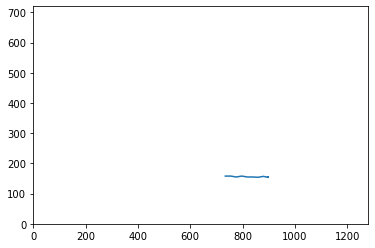

In [32]:
#CODE TO MEASURE THYMIO POSITION AND PLOT IT

importlib.reload(vision)
importlib.reload(globalNavigation)
importlib.reload(utils)

ourThymio = utils.virtualThymio(cap,th)

ourThymio.th.set_var('motor.left.target', 50)
ourThymio.th.set_var('motor.right.target', 50)

#th.set_var('motor.left.target', 2**16-50)
#th.set_var('motor.right.target', 2**16-50)


ps=np.array([ourThymio.readKalman()])
for _ in range(20):
    ps = np.append(ps, [ourThymio.readKalman()], axis = 0)
    time.sleep(1)

th.set_var('motor.left.target', 0)
th.set_var('motor.right.target', 0)

plt.plot(ps[:, 0], ps[:, 1])
plt.xlim(0, 1280)
plt.ylim(0, 720)
print(ps)